In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/kaggle/input/car_price_dataset.csv')
data.head()

Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867

In [3]:
data.shape

(10000, 10)

# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [5]:
sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

In [6]:
print("\nDescriptive Statistics (Numerical Columns):")
print(data.describe())  # Numerical summary
print("\nDescriptive Statistics (Categorical Columns):")
print(data.describe(include=["object"]))  # Categorical summary



Descriptive Statistics (Numerical Columns):
               Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    2011.543700      3.000560  149239.111800      3.497100      2.991100   
std        6.897699      1.149324   86322.348957      1.110097      1.422682   
min     2000.000000      1.000000      25.000000      2.000000      1.000000   
25%     2006.000000      2.000000   74649.250000      3.000000      2.000000   
50%     2012.000000      3.000000  149587.000000      3.000000      3.000000   
75%     2017.000000      4.000000  223577.500000      4.000000      4.000000   
max     2023.000000      5.000000  299947.000000      5.000000      5.000000   

             Price  
count  10000.00000  
mean    8852.96440  
std     3112.59681  
min     2000.00000  
25%     6646.00000  
50%     8858.50000  
75%    11086.50000  
max    18301.00000  

Descriptive Statistics (Categorical Columns)

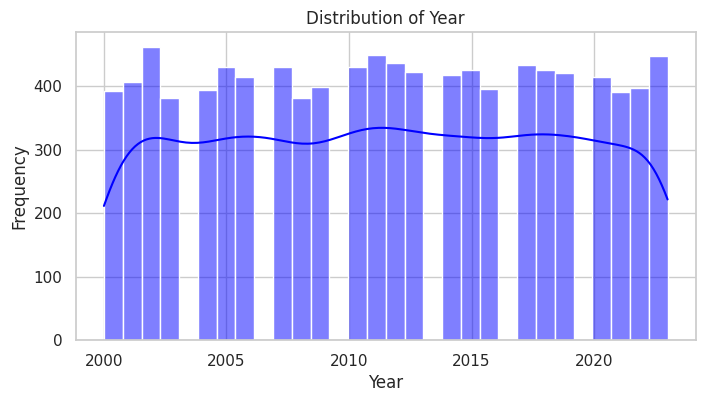

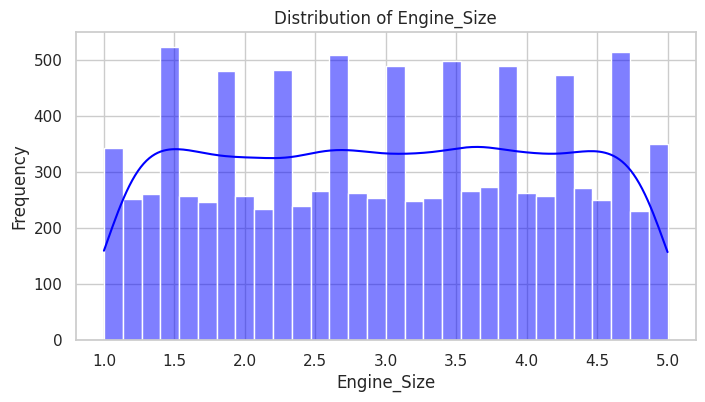

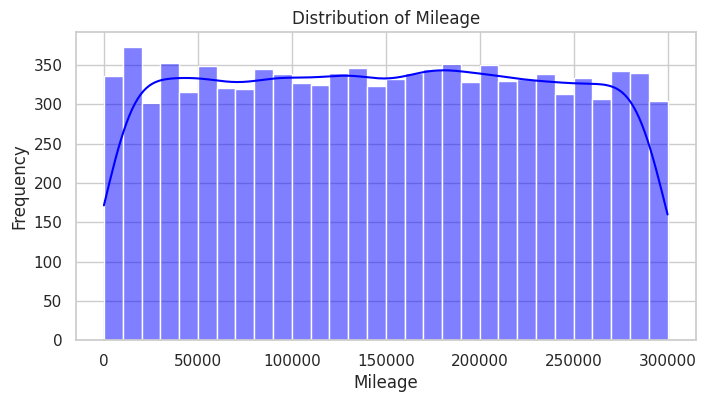

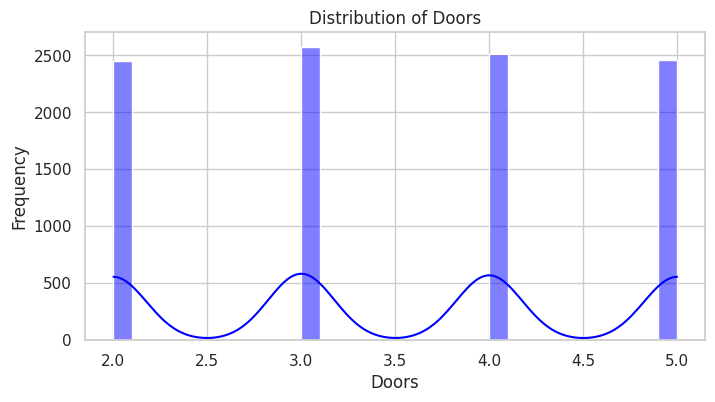

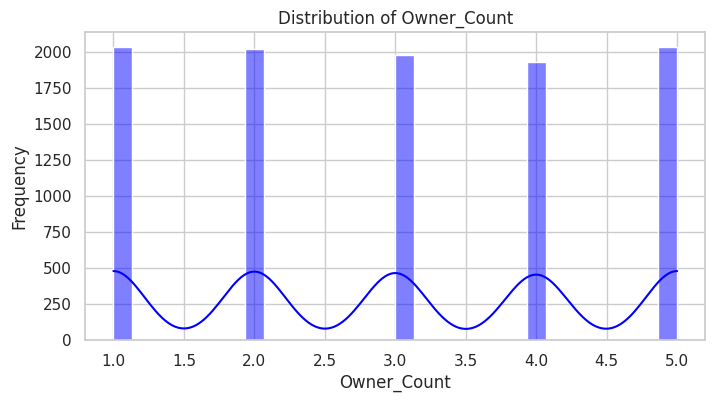

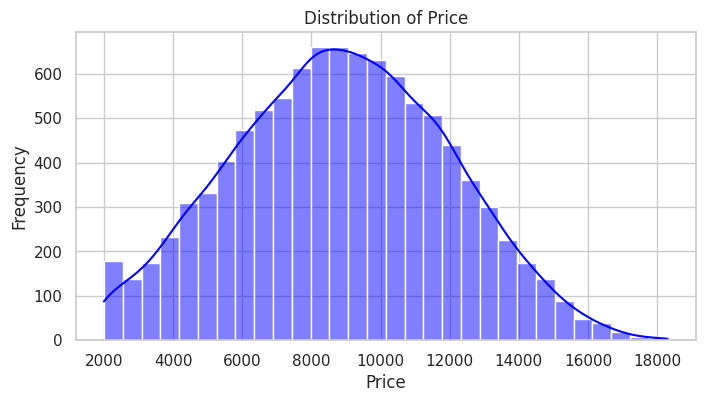

In [7]:
numerical_columns = ["Year", "Engine_Size", "Mileage", "Doors", "Owner_Count", "Price"]

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

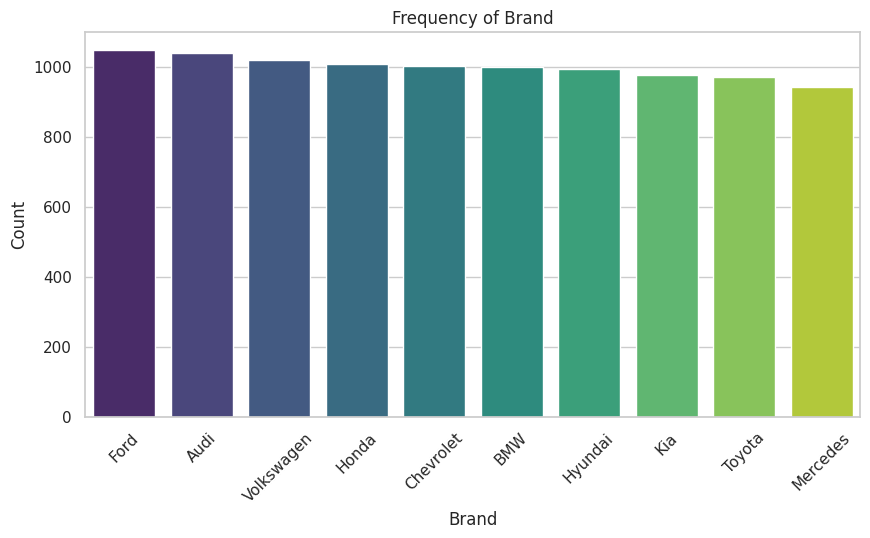

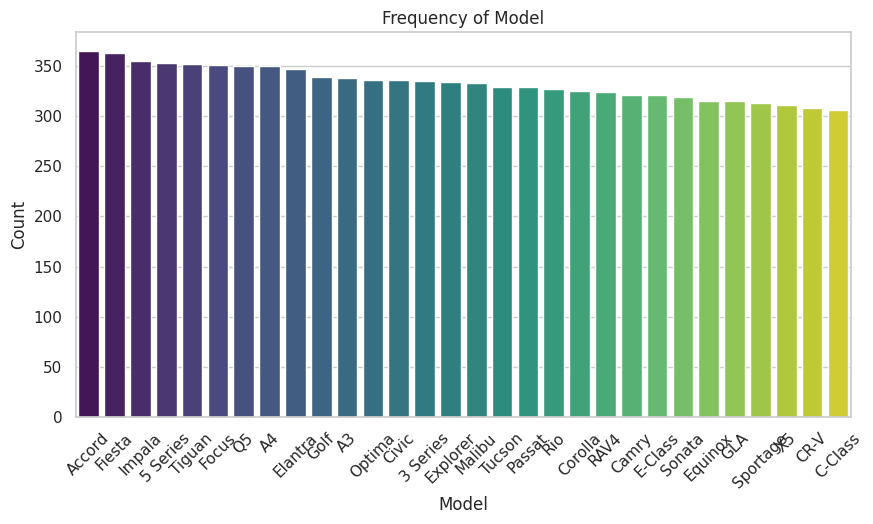

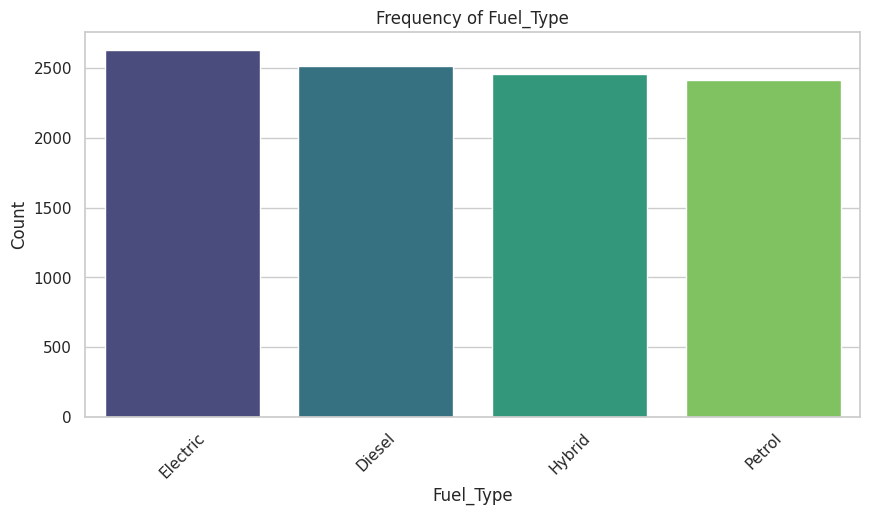

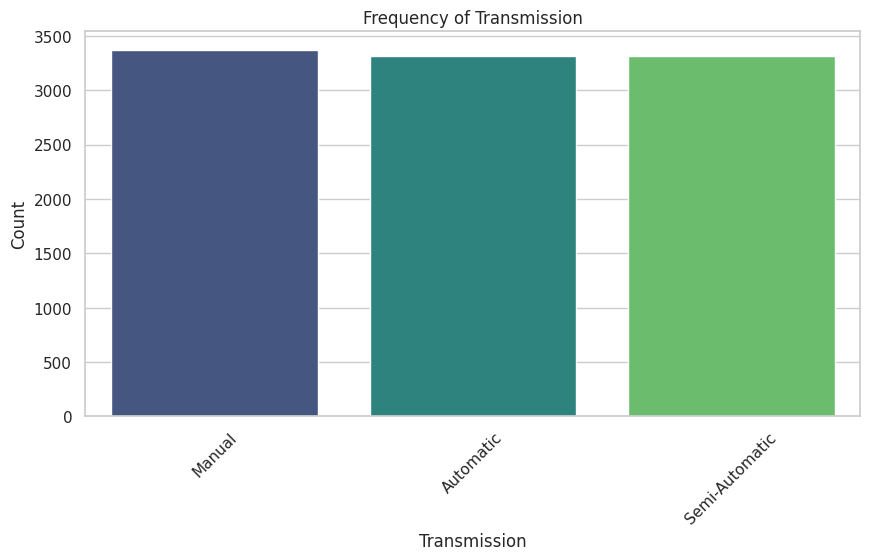

In [8]:
categorical_columns = ["Brand", "Model", "Fuel_Type", "Transmission"]

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")
    plt.title(f"Frequency of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


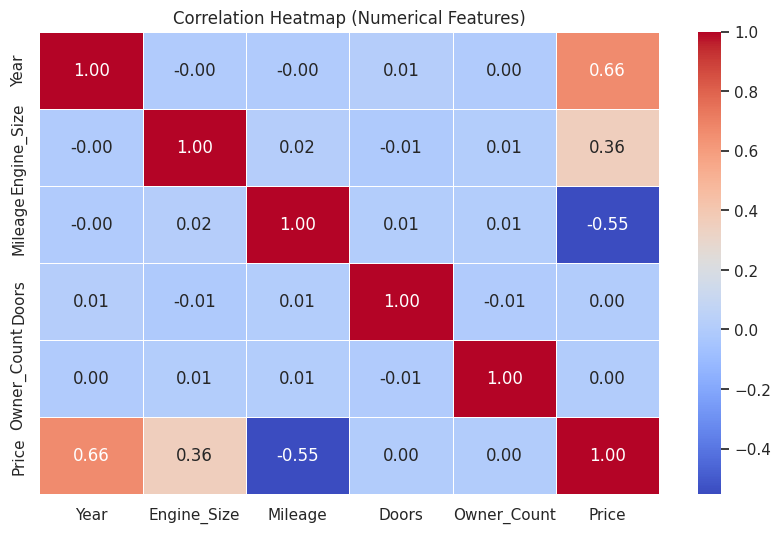

In [9]:
plt.figure(figsize=(10, 6))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

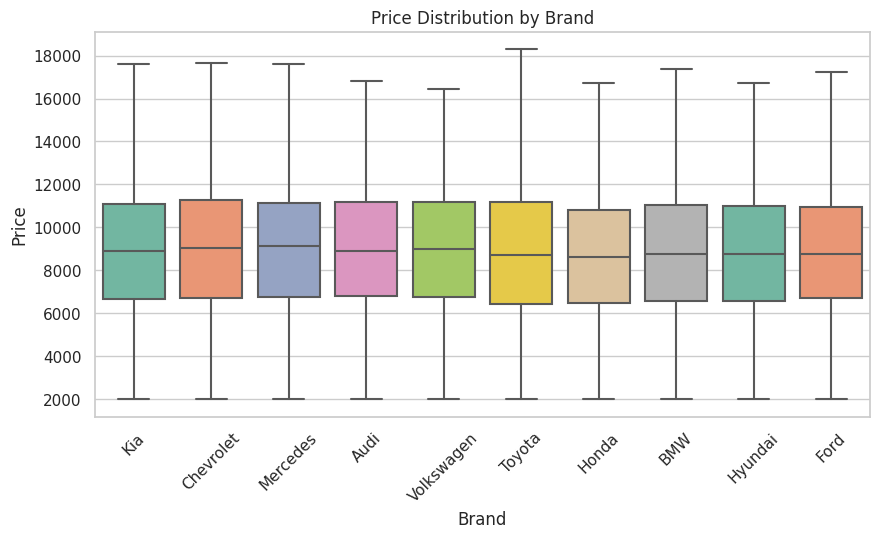

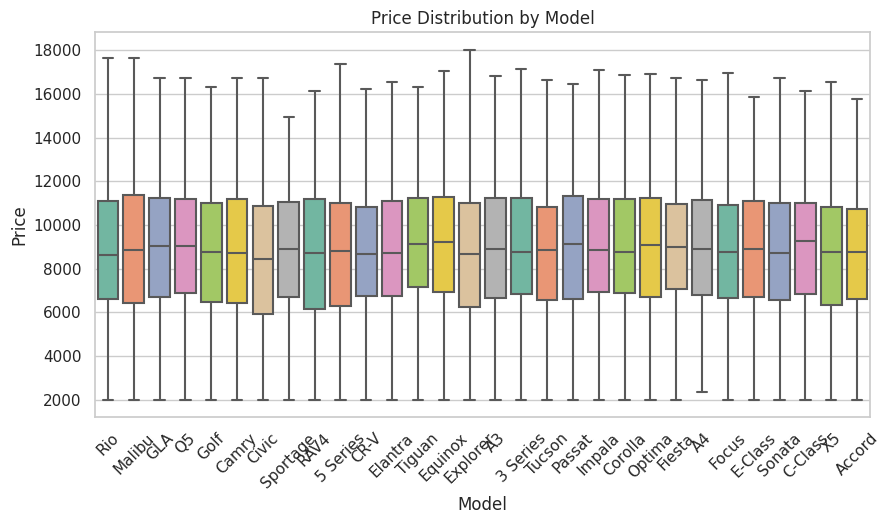

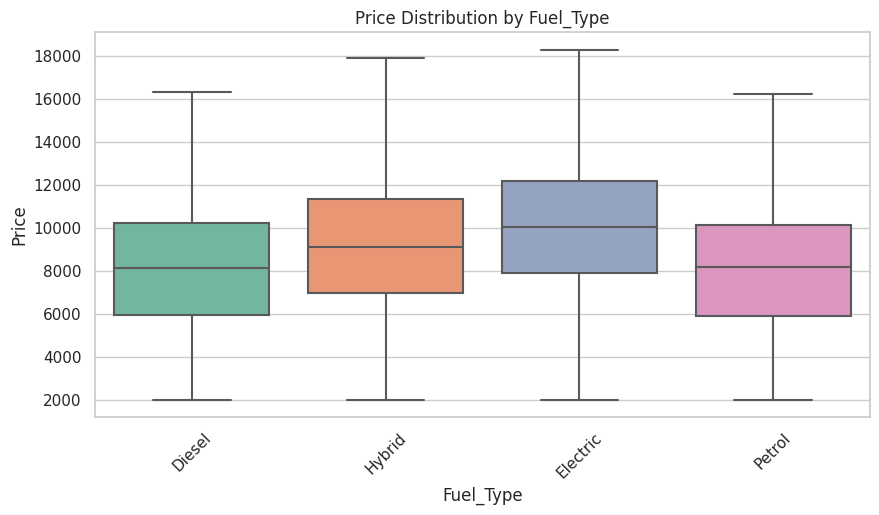

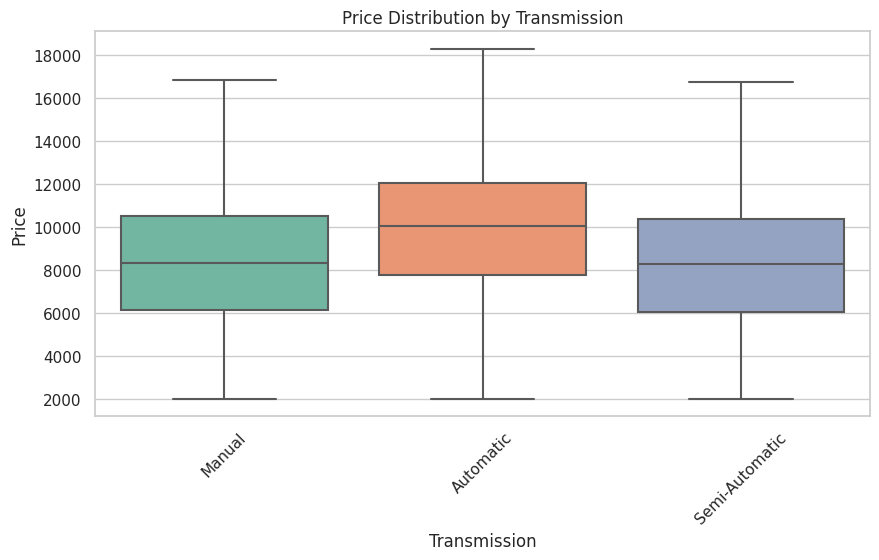

In [10]:
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x=col, y="Price", palette="Set2", showfliers=False)
    plt.title(f"Price Distribution by {col}")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.show()

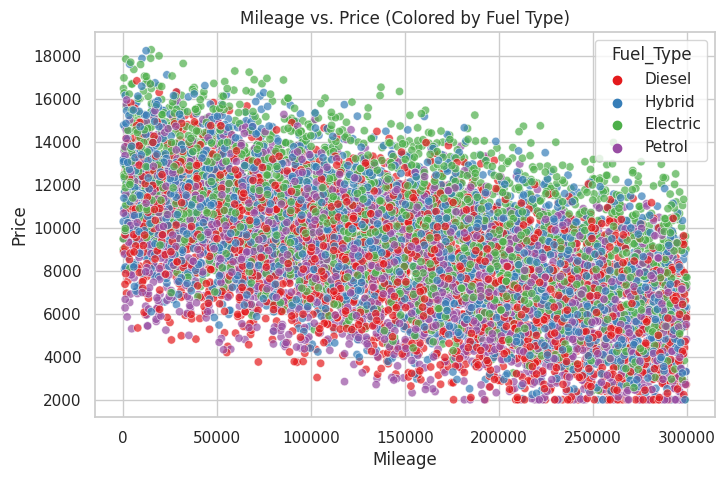

In [11]:
# Scatter Plot for Mileage vs. Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x="Mileage", y="Price", hue="Fuel_Type", palette="Set1", alpha=0.7)
plt.title("Mileage vs. Price (Colored by Fuel Type)")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

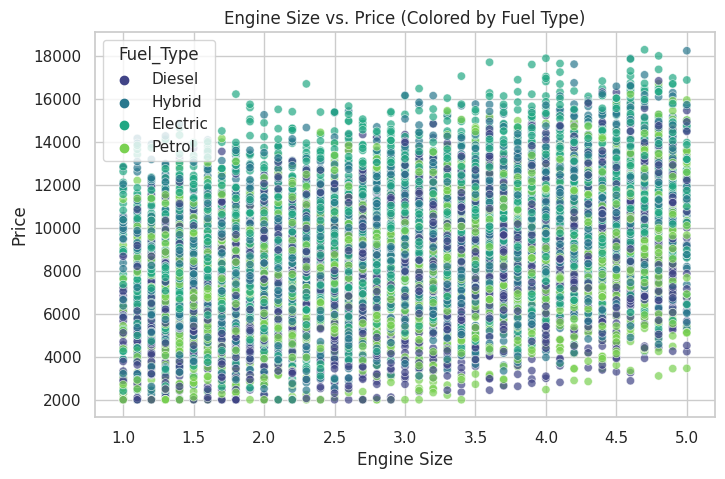

In [12]:
# Scatterplot for Engine Size vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x="Engine_Size", y="Price", hue="Fuel_Type", palette="viridis", alpha=0.7)
plt.title("Engine Size vs. Price (Colored by Fuel Type)")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

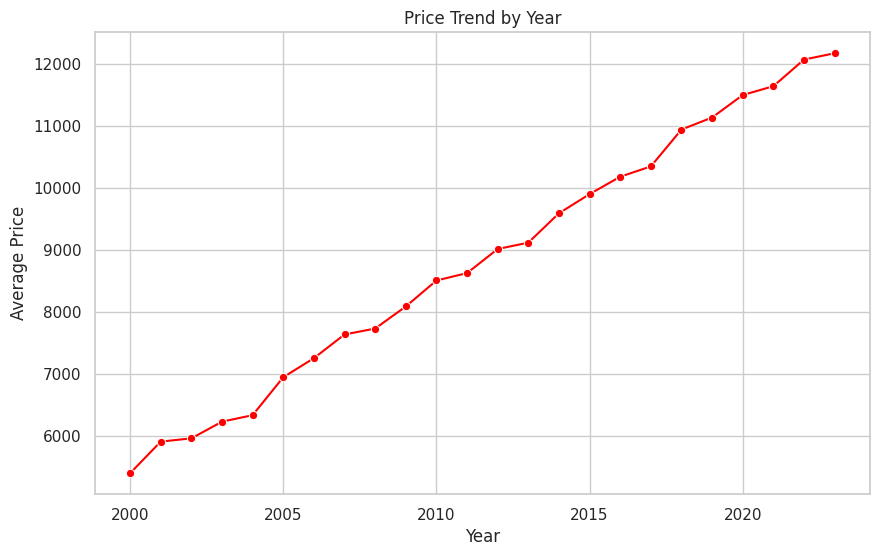

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x="Year", y="Price", marker="o", ci=None, color="red")
plt.title("Price Trend by Year")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()

> Price is increasing continously

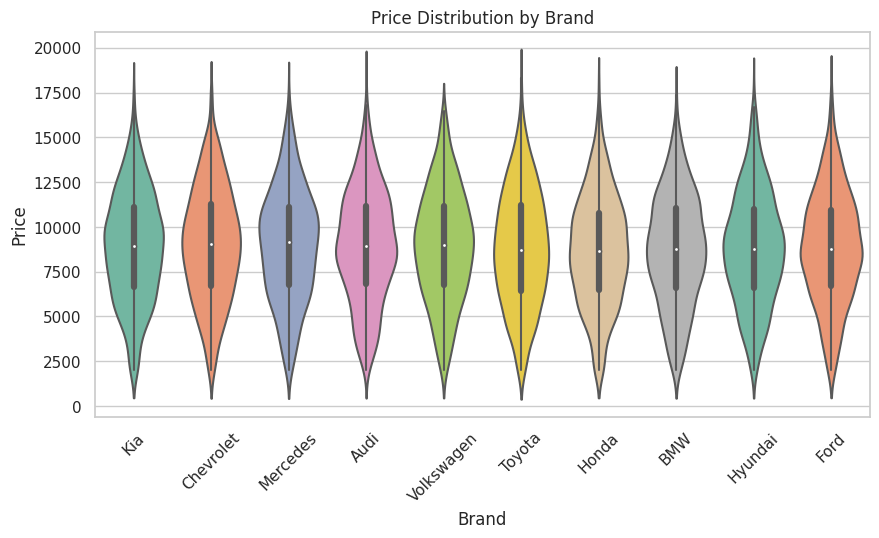

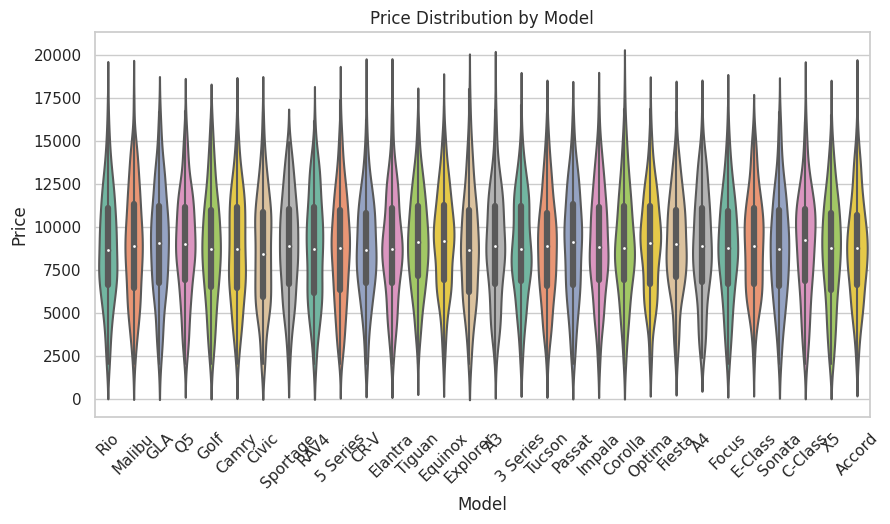

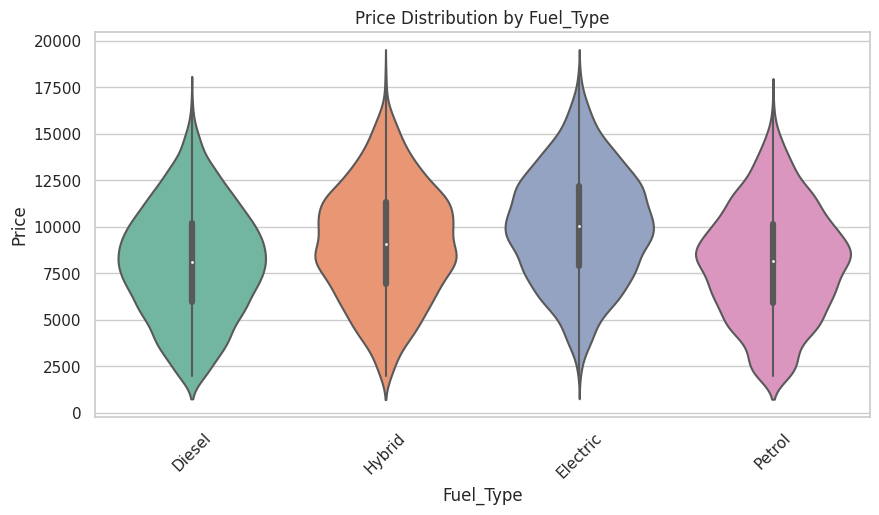

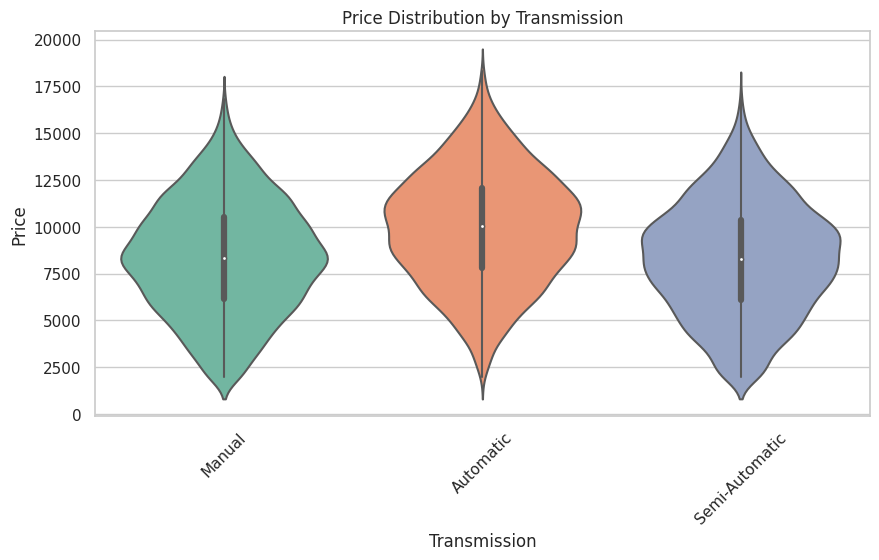

In [14]:
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.violinplot(data=data, x=col, y="Price", palette="Set2")
    plt.title(f"Price Distribution by {col}")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.show()

In [15]:
from scipy.stats import skew, kurtosis

print("\nSkewness and Kurtosis:")
for col in numerical_columns:
    col_skew = skew(data[col])
    col_kurtosis = kurtosis(data[col])
    print(f"{col} - Skewness: {col_skew:.2f}, Kurtosis: {col_kurtosis:.2f}")



Skewness and Kurtosis:
Year - Skewness: -0.01, Kurtosis: -1.19
Engine_Size - Skewness: -0.01, Kurtosis: -1.20
Mileage - Skewness: 0.00, Kurtosis: -1.19
Doors - Skewness: 0.01, Kurtosis: -1.34
Owner_Count - Skewness: 0.02, Kurtosis: -1.31
Price - Skewness: 0.03, Kurtosis: -0.48


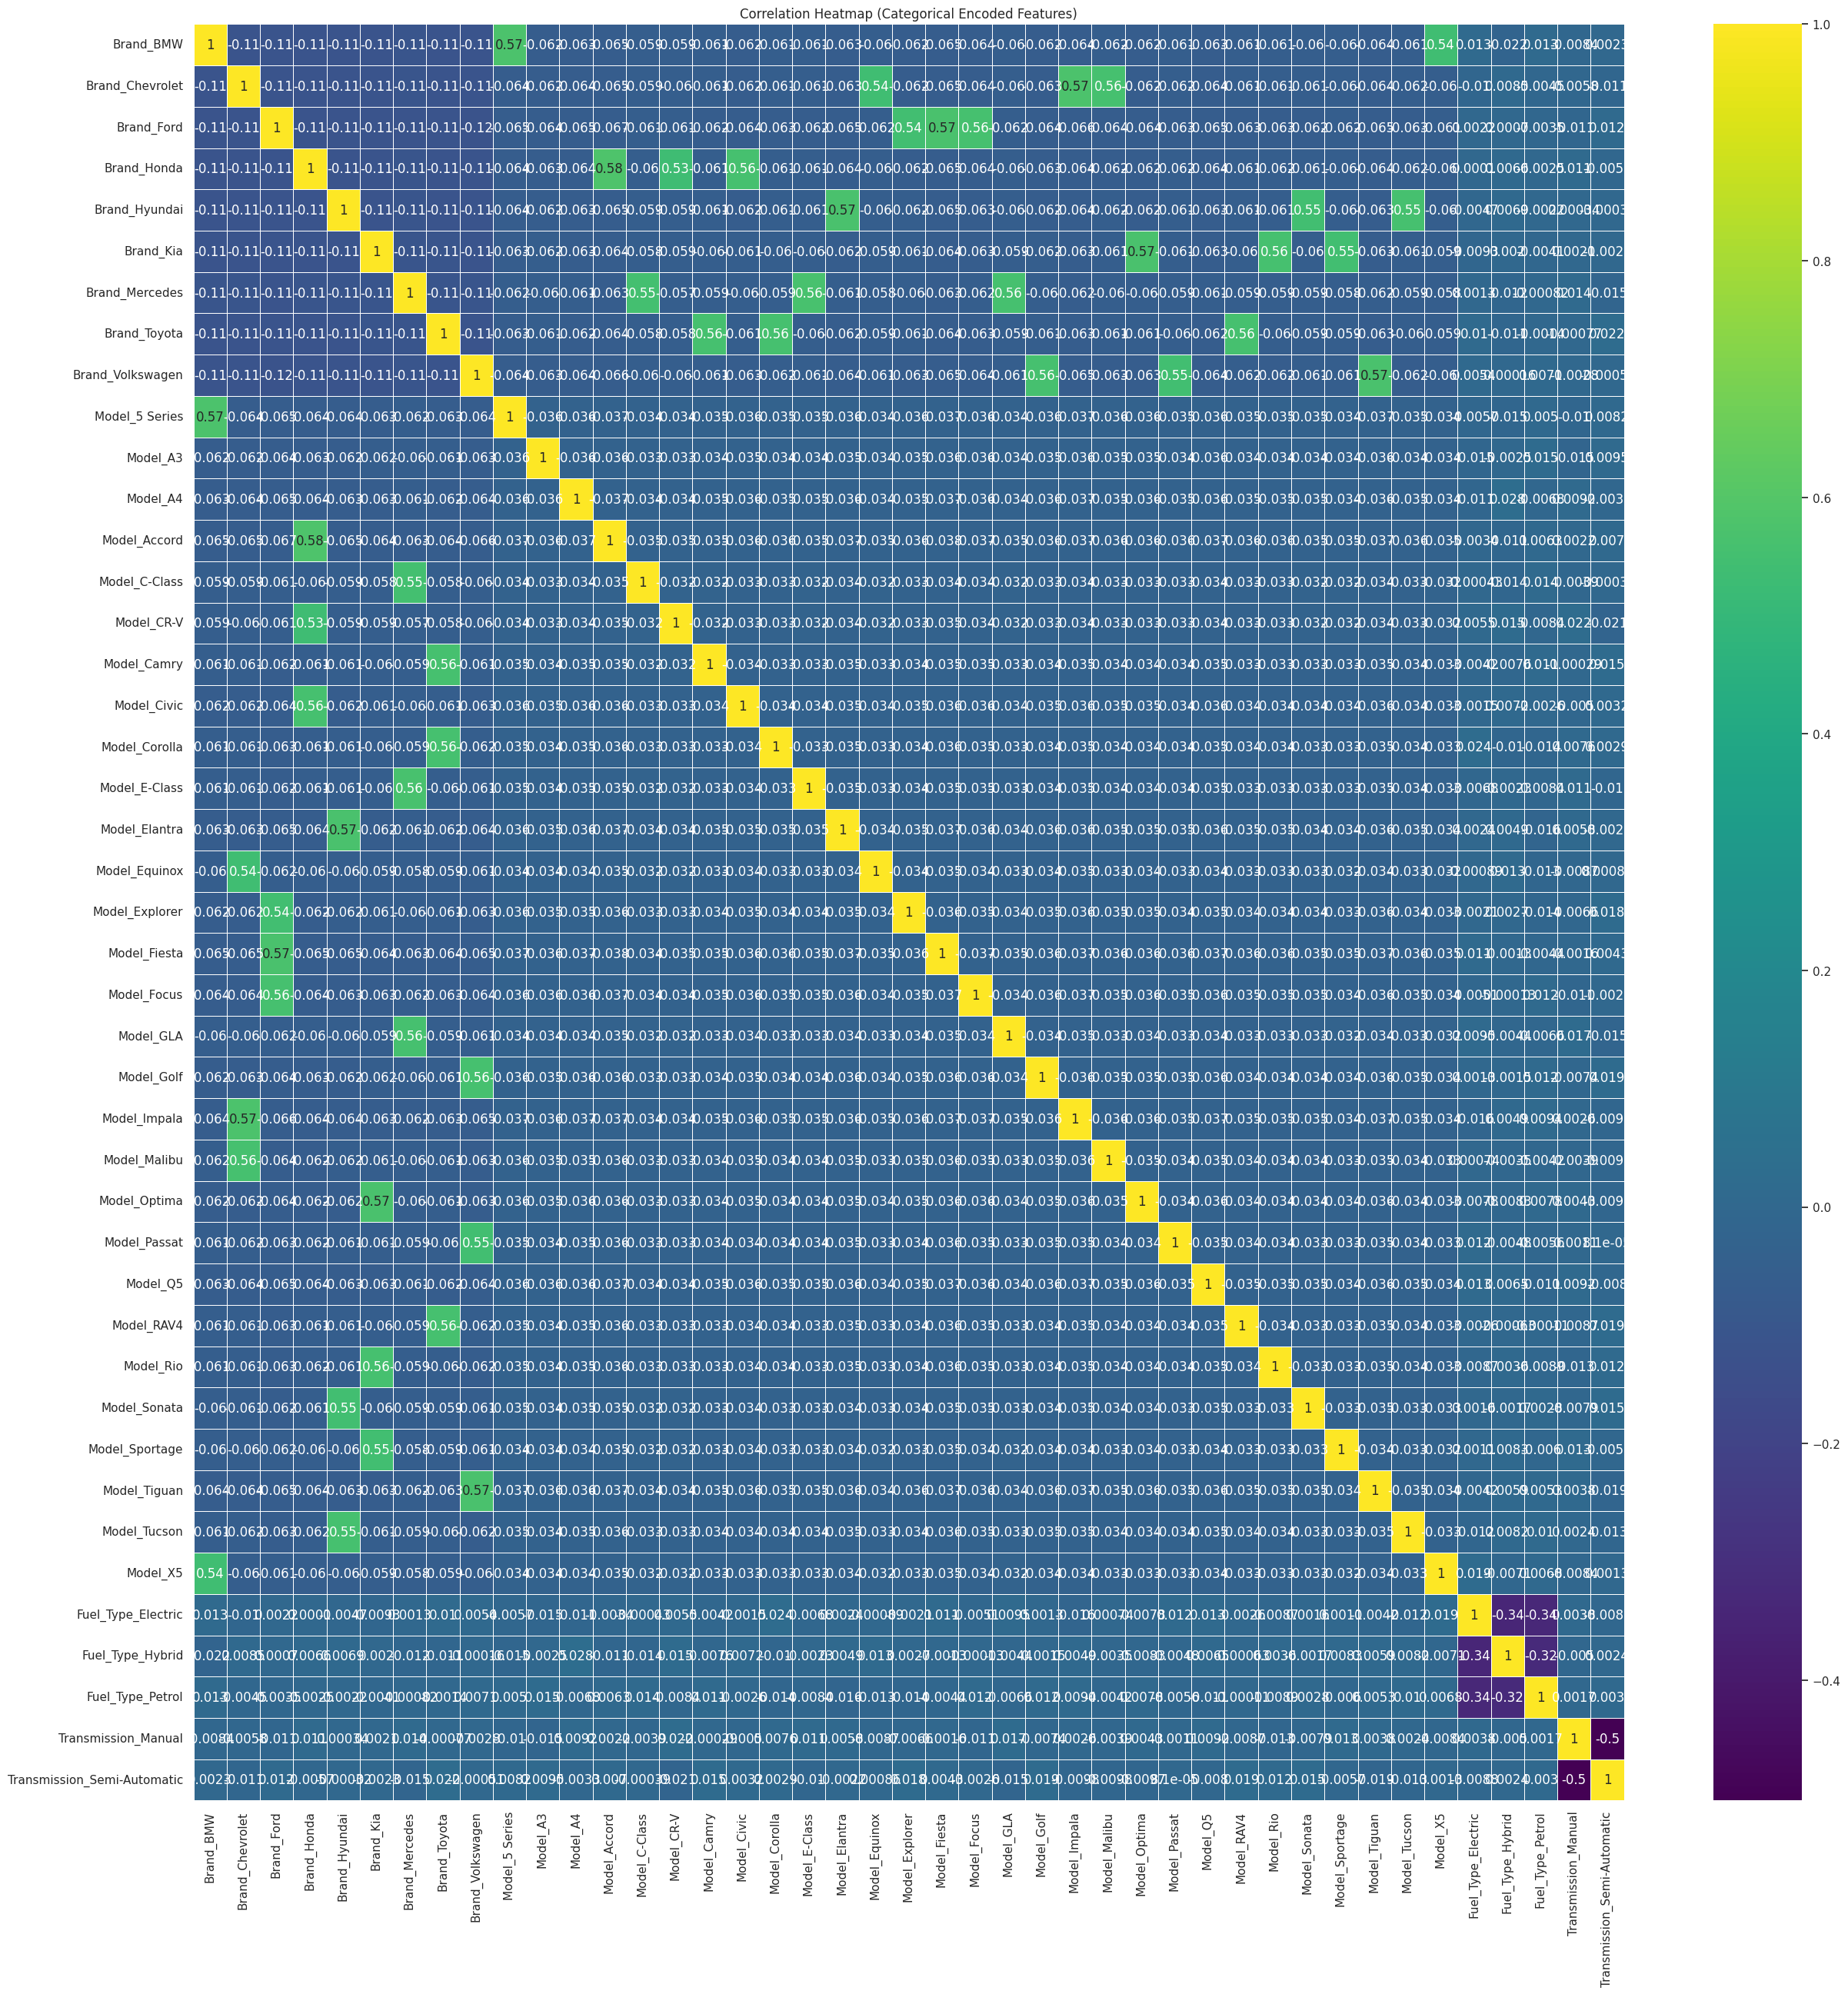

In [16]:
encoded_data = pd.get_dummies(data[categorical_columns], drop_first=True)
plt.figure(figsize=(30,30))
sns.heatmap(encoded_data.corr(), annot=True, cmap="viridis", linewidths=0.5)
plt.title("Correlation Heatmap (Categorical Encoded Features)")
plt.show()

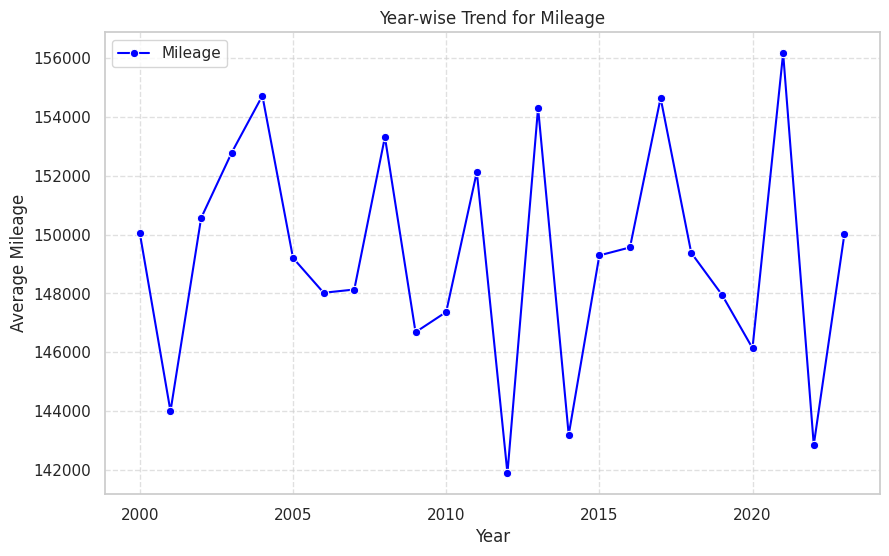

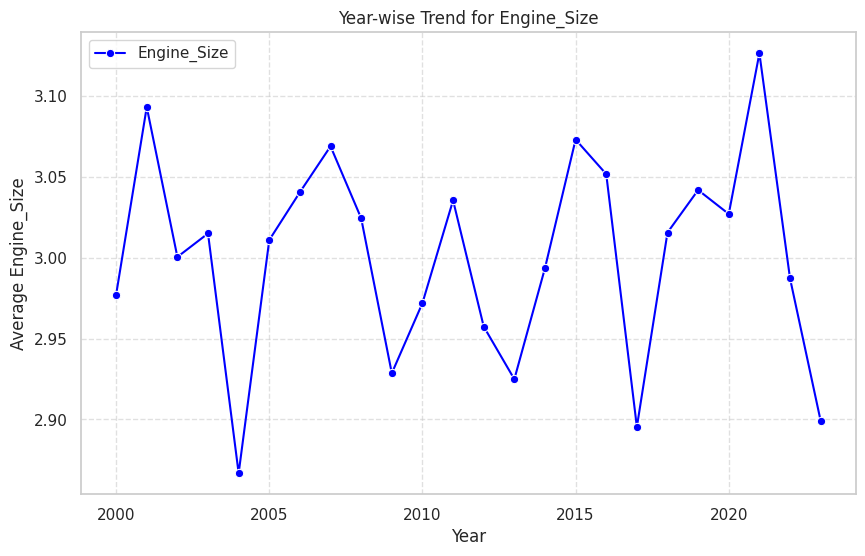

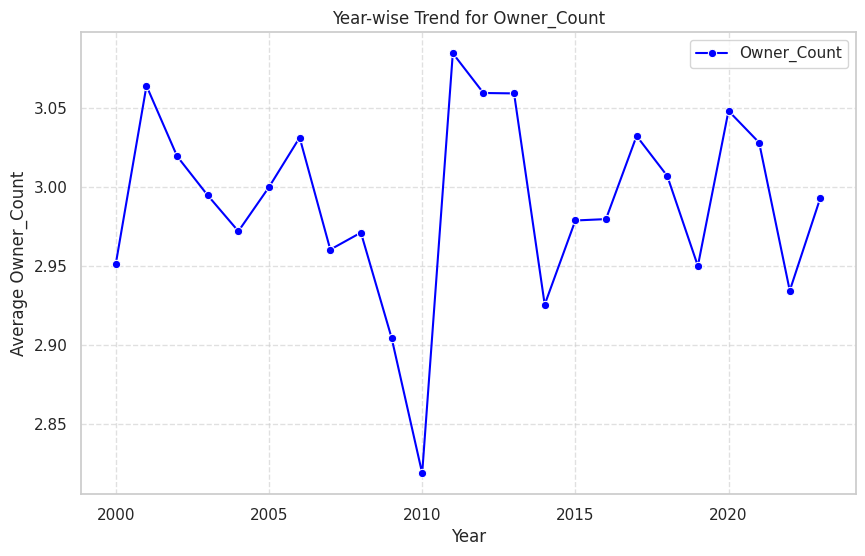

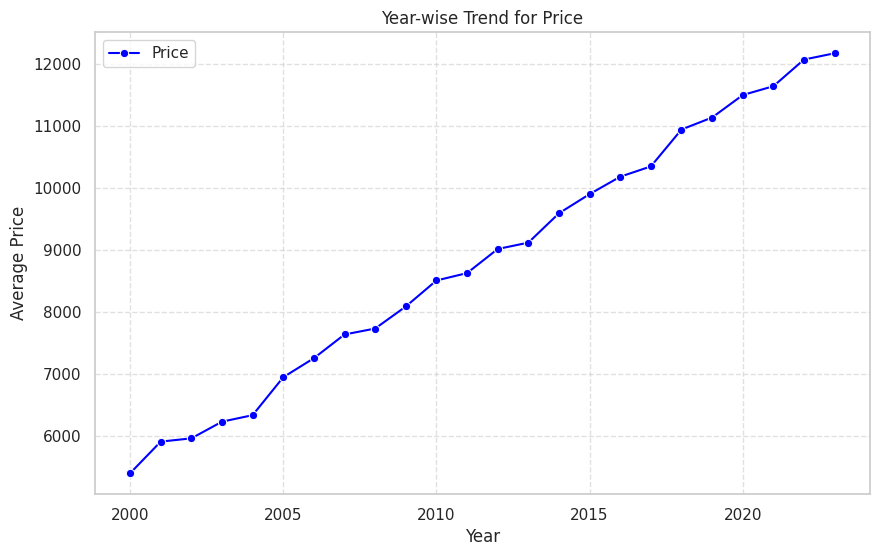

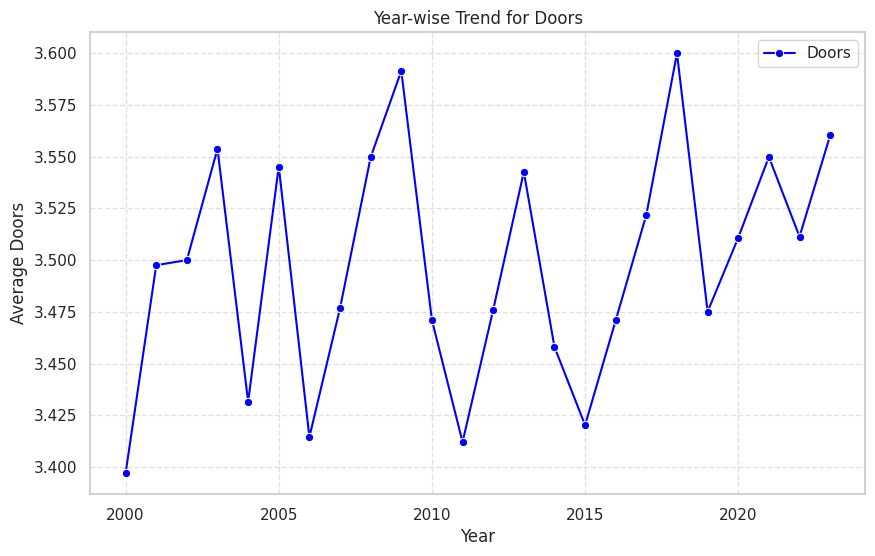

In [17]:
# Grouping data by 'Year' and calculating the mean for numerical variables
yearwise_trends = data.groupby("Year")[["Mileage", "Engine_Size", "Owner_Count", "Price", "Doors"]].mean().reset_index()

# Plotting year-wise trends for each variable
variables_to_plot = ["Mileage", "Engine_Size", "Owner_Count", "Price", "Doors"]

for col in variables_to_plot:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=yearwise_trends, x="Year", y=col, marker="o", color="blue", label=col)
    plt.title(f"Year-wise Trend for {col}")
    plt.xlabel("Year")
    plt.ylabel(f"Average {col}")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()


# Data Visualization

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Separating features and target
features = data.drop("Price", axis=1)
target = data["Price"]

# Identifying categorical and numerical columns
categorical_cols = ["Brand", "Model", "Fuel_Type", "Transmission"]
numerical_cols = ["Year", "Engine_Size", "Mileage", "Doors", "Owner_Count"]

# Preprocessing: Scaling numerical data and encoding categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(), categorical_cols)
    ]
)

processed_features = preprocessor.fit_transform(features)
print(f"Processed Features Shape: {processed_features.shape}")


Processed Features Shape: (10000, 52)


In [19]:
! pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.2 MB/s eta 0:00:00


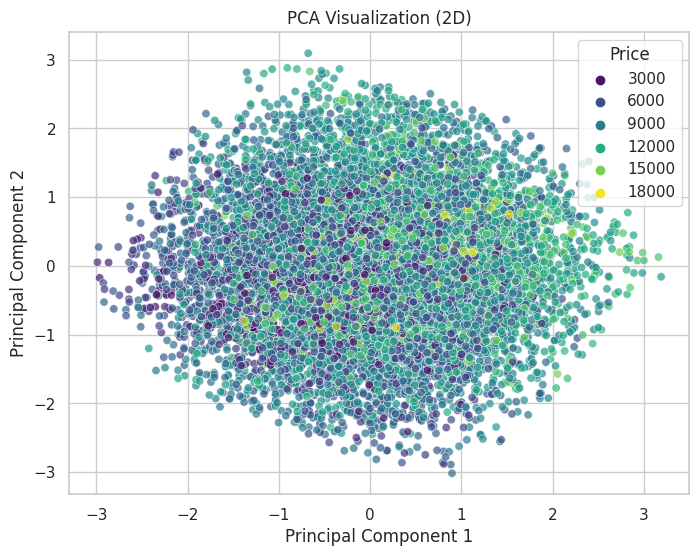

In [20]:
# Applying PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(processed_features.toarray())

# Visualizing PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_features[:, 0], y=pca_features[:, 1], hue=target, palette="viridis", alpha=0.7
)
plt.title("PCA Visualization (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Price", loc="best")
plt.show()


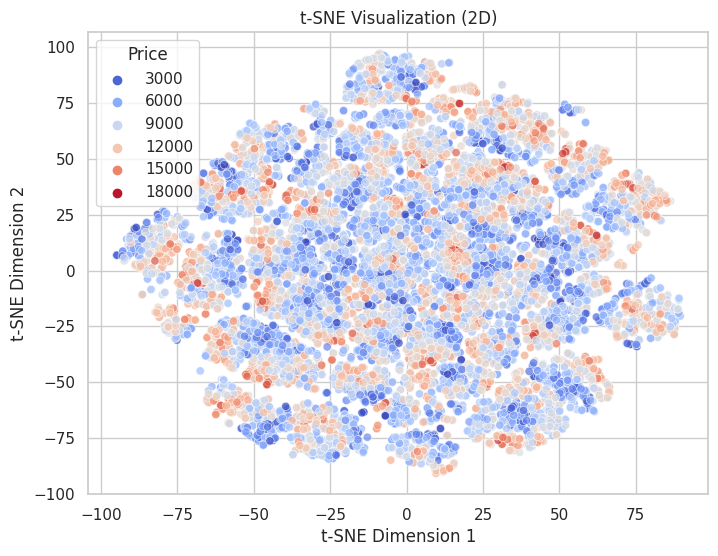

In [21]:
# Applying t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_features = tsne.fit_transform(processed_features.toarray())

# Visualizing t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=tsne_features[:, 0], y=tsne_features[:, 1], hue=target, palette="coolwarm", alpha=0.7
)
plt.title("t-SNE Visualization (2D)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Price", loc="best")
plt.show()


In [22]:
import umap

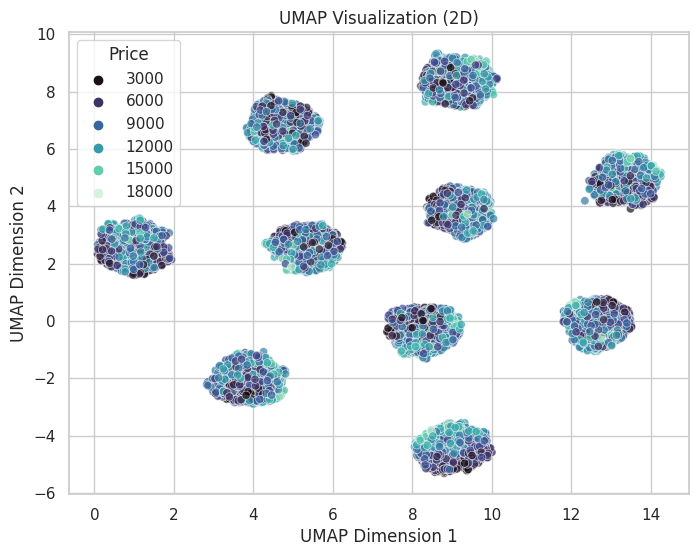

In [23]:
# Applying UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_features = umap_reducer.fit_transform(processed_features.toarray())

# Visualizing UMAP results
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=umap_features[:, 0], y=umap_features[:, 1], hue=target, palette="mako", alpha=0.7
)
plt.title("UMAP Visualization (2D)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Price", loc="best")
plt.show()


# Regression analysis

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate features and target
features = data.drop("Price", axis=1)
target = data["Price"]

# Identify categorical and numerical columns
categorical_cols = ["Brand", "Model", "Fuel_Type", "Transmission"]
numerical_cols = ["Year", "Engine_Size", "Mileage", "Doors", "Owner_Count"]

# Preprocess: Scale numerical features and encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel="rbf"),
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


                            MSE        R2
Linear Regression  4.213925e+03  0.999541
Random Forest      1.121699e+05  0.987791
Gradient Boosting  4.694337e+04  0.994891
XGBoost            5.737476e+04  0.993755
SVR                7.994974e+06  0.129828


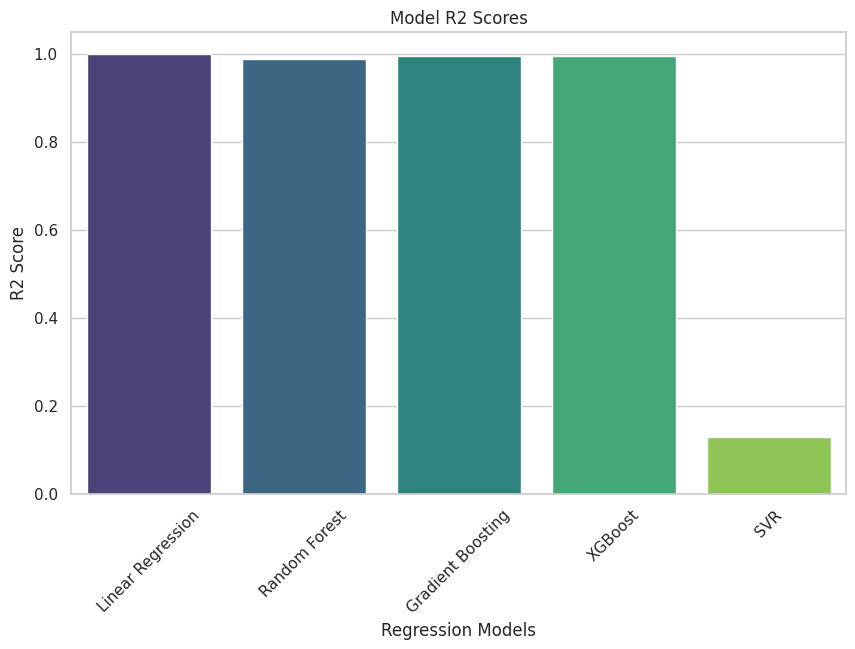

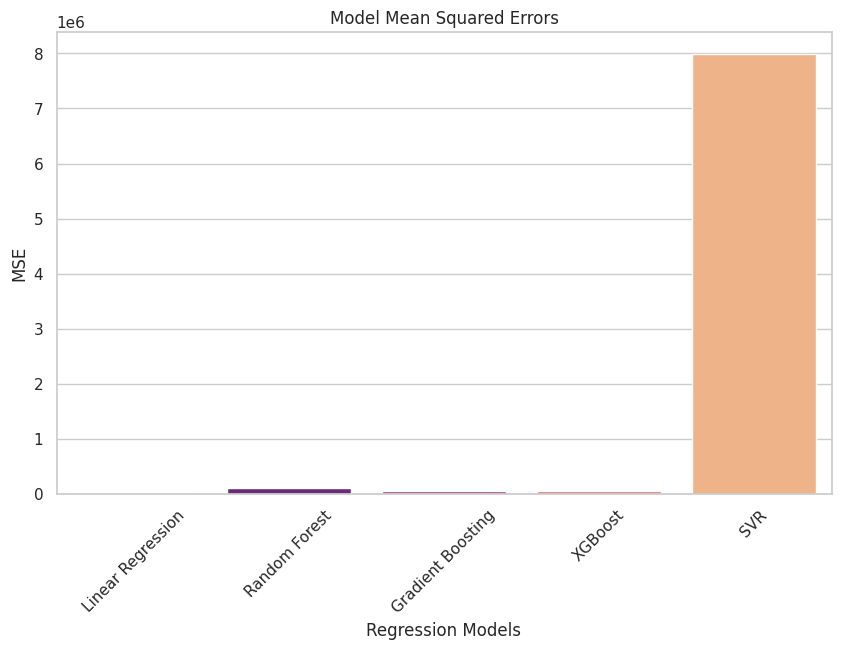

In [26]:
# Plot R2 scores
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df["R2"], palette="viridis")
plt.title("Model R2 Scores")
plt.xlabel("Regression Models")
plt.ylabel("R2 Score")
plt.xticks(rotation=45)
plt.show()

# Plot MSE
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df["MSE"], palette="magma")
plt.title("Model Mean Squared Errors")
plt.xlabel("Regression Models")
plt.ylabel("MSE")
plt.xticks(rotation=45)
plt.show()


In [27]:
best_model = results_df.sort_values("R2", ascending=False).iloc[0]
print(f"Best Model: {best_model.name} with R2={best_model.R2:.2f} and MSE={best_model.MSE:.2f}")


Best Model: Linear Regression with R2=1.00 and MSE=4213.92
